# **Modelo de Prueba 3 - Multinomial Naive Bayes**

### **Estudiante a cargo de la implementación y análisis:** Alonso Hernández Tavera (202012367).

El modelo de clasificación que se va a probar en este Notebook es el **Multinomial Naive Bayes**, el cual consiste en un clasificador probabilístico para calcular la distribución de probabilidad de datos de texto, lo que lo hace muy adecuado para datos con características que representan frecuencias discretas o recuentos de eventos en diversas tareas de procesamiento del lenguaje natural (GeeksforGeeks, 2024).

### **Paréntesis: Interpretación del Hiperparámetro alpha**

Los clasificadores Naive Bayes, incluido el Multinomial Naive Bayes, se basan en el **cálculo de probabilidades de features (o caracerísticas)** dadas las etiquetas de clase. Sin embargo, en la práctica, es común encontrarse con situaciones en las que ciertas características no aparecen en determinadas clases durante el entrenamiento. Esto puede generar **probabilidades de cero** para esas features, lo que puede causar problemas durante la clasificación.

Para solucionar este problema, se aplica el ***suavizado de Laplace*** (también conocido como suavizado aditivo). El suavizado de Laplace agrega un pequeño valor positivo (el ***alfa***) a los recuentos observados de todas las características, suavizando efectivamente las estimaciones de probabilidad y evitando probabilidades cero.

El valor de alfa determina la fuerza del efecto de suavizado. Un alfa mayor da como resultado un suavizado más fuerte. El valor óptimo puede variar según el conjunto de datos y el problema específico en cuestión.

En el caso de la práctica presente, se va a usar un valor determinado por una búsqueda de hiperparámetro con GridSearchCV, el cual evaluará la pureza con el coeficiente F1.


## **1. Carga de Librerías y Herramientas**

In [1]:
# Importación de librerías y herramientas necesarias

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

# Versiones anteriores a 1.2 de sklearn: from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Herramienta para generar métricas en modelos de clasificación
from sklearn.metrics import classification_report


## **2. Carga de datos de Entrenamiento y de Validación**

In [2]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
#Carga de los datos X_train
file_path = '/content/drive/My Drive/Colab Notebooks/Business Intelligence/Proyecto 1/Datos X_Train/X_train_V3.csv'
x_train_data = pd.read_csv(file_path, sep=',', encoding = "ISO-8859-1")
x_train_data.shape

(6254, 10692)

In [6]:
#Carga de los datos X_test
file_path2 = '/content/drive/My Drive/Colab Notebooks/Business Intelligence/Proyecto 1/Datos X_Train/X_validation_V1.csv'
x_test_data = pd.read_csv(file_path2, sep=',', encoding = "ISO-8859-1")
x_test_data.shape

(1575, 10692)

In [13]:
#Carga de los datos Y_train
file_path3 = '/content/drive/My Drive/Colab Notebooks/Business Intelligence/Proyecto 1/Datos X_Train/Y_train_V1.csv'
y_train_data = pd.read_csv(file_path3, sep=',', encoding = "ISO-8859-1")

y_train_data = y_train_data['Class']

y_train_data.shape

(6254,)

In [15]:
#Carga de los datos Y_test
file_path4 = '/content/drive/My Drive/Colab Notebooks/Business Intelligence/Proyecto 1/Datos X_Train/Y_validation_V1.csv'
y_test_data = pd.read_csv(file_path4, sep=',', encoding = "ISO-8859-1")

y_test_data = y_test_data['Class']

y_test_data.shape

(1575,)

In [16]:
#Carga de datos Unlabeled
file_path5 = '/content/drive/My Drive/Colab Notebooks/Business Intelligence/Proyecto 1/Datos X_Train/X_unlabeled_V1.csv'
x_unlabeled_data = pd.read_csv(file_path5, sep=',', encoding = "ISO-8859-1")
x_unlabeled_data.shape

(1750, 10692)

## **3. Creación del Modelo Multinomial**

In [17]:
# Crear y entrenar el modelo multinomial Naive Bayes
model = MultinomialNB()
model.fit(x_train_data, y_train_data.values.ravel())

MultinomialNB()

### **Búsqueda de Hiperparámetros con GridSearchCV**

In [29]:
# Definición de la cuadrícula de hiperparámetros
param_grid = {'alpha': [0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.1, 1.2]}

# Inicialización de GridSearchCV
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, scoring='f1_macro', cv=5)
grid_search.fit(x_train_data, y_train_data.values.ravel())

# Obtención de los mejores hiperparámetros
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'alpha': 0.92}


### **Creación del Mejor Modelo Estimado**

In [30]:
# Utilización de los mejores hiperparámetros encontrados con GridSearchCV
best_alpha = best_params['alpha']

# Creación de un nuevo modelo con los mejores hiperparámetros.
best_model = MultinomialNB(alpha=best_alpha)

# Entrenamiento del nuevo modelo con los datos de train.
best_model.fit(x_train_data, y_train_data.values.ravel())  # Flatten y_train if it has multiple columns

MultinomialNB(alpha=0.92)

## **4. Evaluación del Mejor Modelo Construído**

In [31]:
# Predicción en el conjunto de prueba
y_pred = best_model.predict(x_test_data)

# Informe de clasificación
print("Reporte de la Clasificación:\n")
print(classification_report(y_test_data, y_pred))

Reporte de la Clasificación:

              precision    recall  f1-score   support

           1       0.37      0.30      0.33       152
           2       0.37      0.34      0.35       234
           3       0.38      0.34      0.36       315
           4       0.47      0.47      0.47       430
           5       0.58      0.69      0.63       444

    accuracy                           0.47      1575
   macro avg       0.43      0.43      0.43      1575
weighted avg       0.46      0.47      0.46      1575



### **Determinación de los atributos (features) más relevantes**

In [32]:
# Obtención de las probabilidades de registro de características (coeficientes) del modelo
feature_log_probs = best_model.feature_log_prob_

# Conversión de las probabilidades logarítmicas en probabilidades
feature_probs = np.exp(feature_log_probs)

# Creación de un marco de datos para mostrar la importancia de las funciones
importance_df = pd.DataFrame(feature_probs, columns=x_train_data.columns)


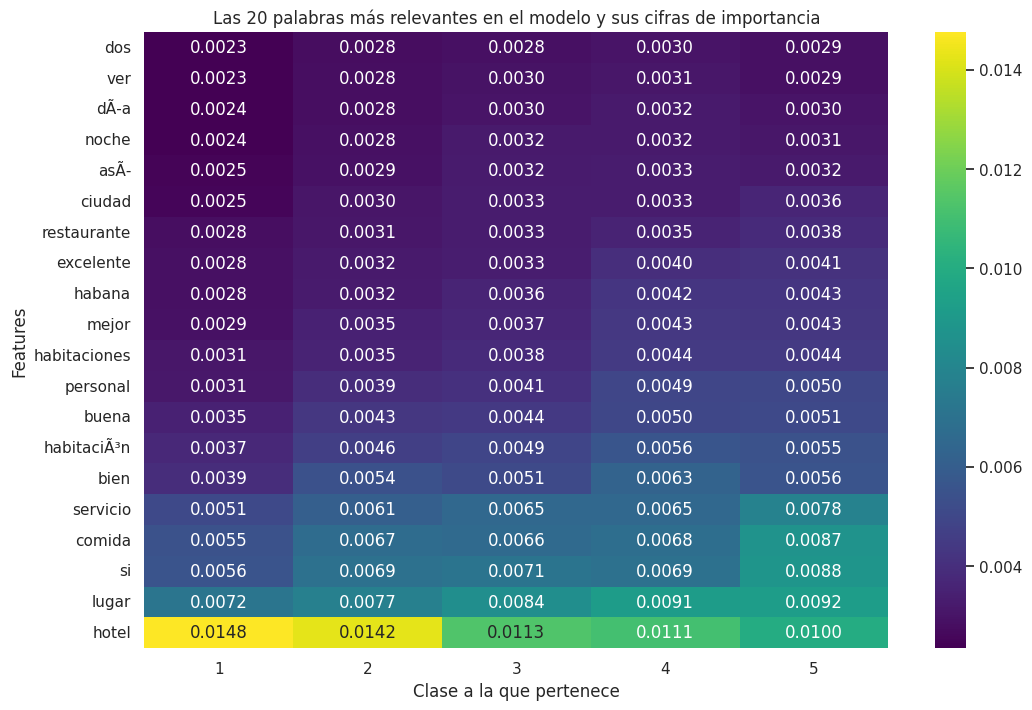

In [42]:
# Gráfica de la importancia de las TOP 20 características como un mapa de calor

# Obtención de las 20 características más importantes para cada clase
top_features = {}
for i, class_probs in enumerate(feature_probs):
    top_indices = np.argsort(class_probs)[-20:]
    top_features[i + 1] = class_probs[top_indices]

# Creación de un nuevo DataFrame con solo las 20 características más importantes
top_features_df = pd.DataFrame(top_features, index=importance_df.columns[np.argsort(feature_probs.mean(axis=0))[-20:]])

# Gráfica de las 20 características más importantes como un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(top_features_df, cmap='viridis', annot=True, fmt='.4f')
plt.title('Las 20 palabras más relevantes en el modelo y sus cifras de importancia')
plt.xlabel('Clase a la que pertenece')
plt.ylabel('Features')
plt.show()

In [41]:
# Visualización del TOP 20 features (palabras) como una lista

top_features = {}
for i, class_probs in enumerate(feature_probs):
    top_indices = np.argsort(class_probs)[-20:]
    top_features[i + 1] = list(zip(importance_df.columns[top_indices], class_probs[top_indices]))

# Aplanación del diccionario de características principales
all_top_features = [feature for class_features in top_features.values() for feature in class_features]

# Ordenación de las funciones principales por números de importancia en orden descendente
sorted_top_features = sorted(all_top_features, key=lambda x: x[1], reverse=True)

# Las 20 funciones principales ordenadas de mayor a menor importancia
print("Las 20 features principales ordenadas de mayor a menor importancia:\n")
for idx, (feature, importance) in enumerate(sorted_top_features[:20], start=1):
    print(f"{idx}. {feature}: {importance:.4f}")


Las 20 features principales ordenadas de mayor a menor importancia:

1. hotel: 0.0148
2. hotel: 0.0142
3. hotel: 0.0113
4. hotel: 0.0111
5. lugar: 0.0100
6. comida: 0.0092
7. lugar: 0.0091
8. excelente: 0.0088
9. servicio: 0.0087
10. si: 0.0084
11. hotel: 0.0078
12. habitaciÃ³n: 0.0077
13. habitaciÃ³n: 0.0072
14. bien: 0.0071
15. si: 0.0069
16. si: 0.0069
17. bien: 0.0068
18. servicio: 0.0067
19. lugar: 0.0066
20. comida: 0.0065


## **5. Predicciones sobre los Datos Unlabeled**

Predicted Scores:
      Predicted_Score
0                   1
1                   5
2                   5
3                   4
4                   3
...               ...
1745                5
1746                3
1747                5
1748                3
1749                2

[1750 rows x 1 columns]


<ipython-input-47-632782bfa248>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_Score', data=predictions_df, palette='viridis')


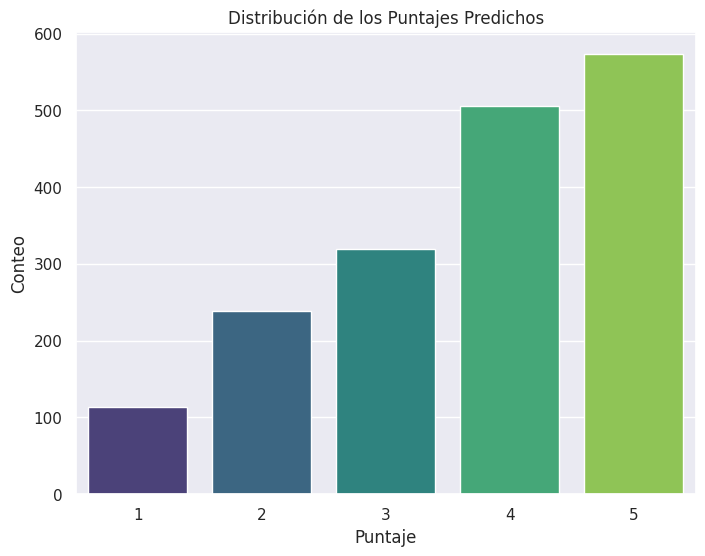

In [47]:
# Realización de predicciones sobre los datos sin etiquetar.
predictions = best_model.predict(x_unlabeled_data)

# Conversión de las predicciones a un DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Predicted_Score'])

# Muestra de las predicciones
print("Predicted Scores:")
print(predictions_df)

# Gráfica de la distribución de puntuaciones previstas
plt.figure(figsize=(8, 6))
sns.countplot(x='Predicted_Score', data=predictions_df, palette='viridis')
plt.title('Distribución de los Puntajes Predichos')
plt.xlabel('Puntaje')
plt.ylabel('Conteo')
plt.show()

In [48]:
class_totals = predictions_df['Predicted_Score'].value_counts()

# Muestra de la cantidad total en cada clase prevista
print("Cantidad total en cada clase predicha:\n")
print(class_totals)

Cantidad total en cada clase predicha:

Predicted_Score
5    573
4    505
3    319
2    239
1    114
Name: count, dtype: int64


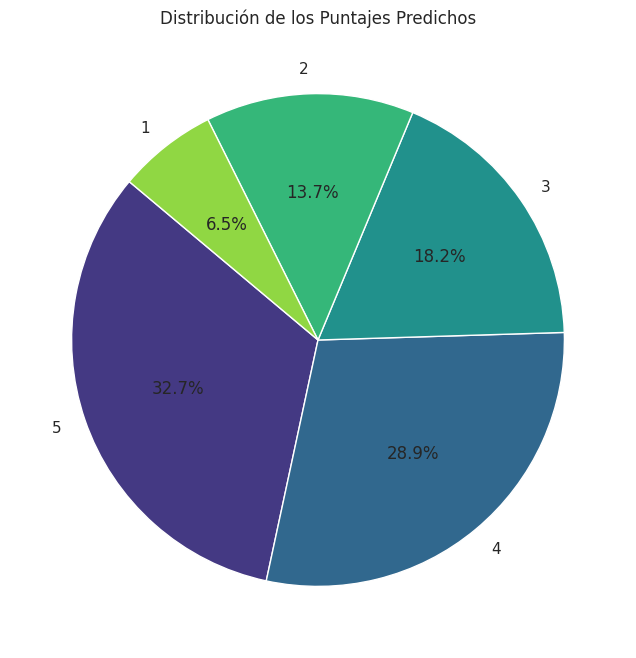

In [50]:
# Muestra de la distribución de los datos en las clases predichas con un diagrama pie

plt.figure(figsize=(8, 8))
class_totals.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(class_totals)))
plt.title('Distribución de los Puntajes Predichos')
plt.ylabel('')
plt.show()

## **6. Exportación de los Datos Predichos a un archivo csv**

In [51]:
# Exportación de los datos previstos a un archivo CSV
predictions_df.to_csv('Unlabeled_data_predictions.csv', index=False)

# Confirmación de que el archivo CSV ha sido creado
print("Predicted data has been exported to 'Unlabeled_data_predictions.csv'")


Predicted data has been exported to 'Unlabeled_data_predictions.csv'


## **7. Análisis de los Resultados Obtenidos**
En esta sección, se presentan los análisis cualitativo y cuantitativo realizados sobre los resultados obtenidos para este modelo Multinomial-Bayes implementado.

### **7.1 Análisis Cuantitativo**

Los siguientes fueron los resultados obtenidos luego de ejecutar el modelo sobre los datos de validación y calcular coeficientes de pureza de la tarea de clasificación.

1. Al realizar un proceso de búsqueda de hiperparámetros por medio del algoritmo GridSearchCV tomando como referencia el coeficiente F1 para encontrar el mejor valor para alpha dentro del modelo Multinomial Naive Bayes, se determinó que **0.92 **es el que da un mejor valor de pureza en la clasificación.

2. El hecho de que 0.92 sea la magnitud de alpha más conveniente para lograr una mejor clasificación, indica que **el modelo encontró un equilibrio** entre confiar en los recuentos de características observadas y aplicar algún nivel de suavización para evitar probabilidades cero.

3. Luego de construir el mejor modelo con alpha igual a 0.92 y aplicarlo sobre el conjunto preprocesado de datos X_train, se calcularon coeficientes de pureza para evaluar la calidad de esa clasificación respecto a la clasificación real y_test y el resultado fue el siguiente:

  - Precisión: 0.46
  - Recall: 0.47
  - F1-score: 0.46

  Estos valores son los correspondientes **ponderados** según la cantidad de datos en cada clase, pues se observó un desbalance en esta cantidad.

  A continuación, se describe lo que significan estos valores para cada coeficiente de pureza dentro del modelo.

    **3.1** Una precisión de 0,47 indica que aproximadamente el 47 % de las instancias del conjunto de datos X_train fueron clasificadas correctamente por el modelo. Una precisión baja sugiere que el rendimiento del modelo no es muy alto y puede que no sea confiable para hacer predicciones sobre datos nuevos e invisibles sin mejoras adicionales.

    **3.2** Un Recall de 0,46 indica que aproximadamente el 46 % de los casos **Reales Positivos** en el conjunto de datos fueron identificados correctamente por el modelo. Un Recall bajo sugiere que al modelo le pueden faltar una cantidad significativa de casos positivos, lo que implica un número alto de falsos negativos.

    **3.3** El F1 score es la media *armónica* de precisión y Recall. Proporciona un equilibrio entre precisión y recuperación, especialmente cuando las clases están desequilibradas. Una puntuación F1 de 0,47 indica una media armónica de precisión y de Recall, dándose igual importancia a ambas métricas.

4. Luego de encontrar estos coeficientes de pureza sobre la clasificación realizada sobre los datos de entrenamiento del modelo, se determinó la importancia relativa de aquellos features (palabras de las review en este caso) que hicieron parte de las estimaciones del modelo. Al respecto, se obtuvo el siguiente top 20 en orden mayor a menor en relevancia.

    1. hotel: 0.0148
    2. hotel: 0.0142
    3. hotel: 0.0113
    4. hotel: 0.0111
    5. lugar: 0.0100
    6. comida: 0.0092
    7. lugar: 0.0091
    8. excelente: 0.0088
    9. servicio: 0.0087
    10. si: 0.0084
    11. hotel: 0.0078
    12. habitaciÃ³n: 0.0077
    13. habitaciÃ³n: 0.0072
    14. bien: 0.0071
    15. si: 0.0069
    16. si: 0.0069
    17. bien: 0.0068
    18. servicio: 0.0067
    19. lugar: 0.0066
    20. comida: 0.0065

  Esto permite evidenciar que la palabra hotel ha sido la más relevante a la hora de determinar el puntaje de las review de los turistas en 4 de los 5 posibles puntajes. A partir de este resultado, se puede concluir que los hoteles donde estas personas se hospedan influyen de gran manera en la experiencia general percibida por cada una en sus planes de turismo.


<br>

5. Luego de tener los resultados anteriores, se aplicó el mejor modelo obtenido sobre los datos unlabeled procesados con anterioridad para revisar el resultado generado por este. Al respecto, se obtuvo la siguiente distribución de clases (los 5 posibles puntajes de experiencia de las personas):

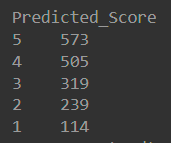

  Lo cual permite ver una distribución inequitativa de las diferentes clases que corresponden a los puntajes predichos según las palabras de cada reseña de los turistas.

  Esta distribución es más fácilmente visible en la siguiente gráfica de torta:

  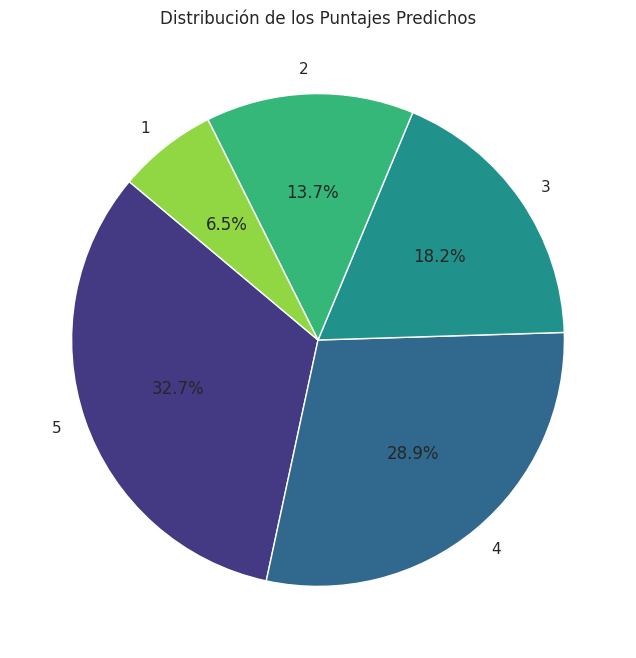

Al revisar la distribución de los datos Train luego del preprocesamiento inicial, el equipo determinó que estos porcentajes son muy parecidos a esos iniciales (que se pueden ver en el notebook de Preprocesamiento) y, por lo tanto, concluimos que este modelo implementado con Multinomial Naive Bayes,**es útil para dar estimaciones de las calificaciones de los turistas en casi la mitad de los casos en los que se aplica**.

### **7.2 Análisis Cualitativo**

1. La precisión, el Recall y la puntuación F1 del modelo son los 3 casi el mismo valor (0,47), lo que indica que el rendimiento del modelo es moderado pero no muy preciso.

  La precisión sugiere que aproximadamente la mitad de los casos se clasifican correctamente, lo que está por debajo de lo que se esperaría de un modelo altamente confiable.

  El Recall indica que el modelo solo captura aproximadamente la mitad de los casos positivos reales, lo que sugiere que puede faltarle información importante.


2. La industria del turismo depende en gran medida de la satisfacción y la retroalimentación del cliente para mejorar las atracciones y los servicios. Por lo tanto, predecir con precisión las puntuaciones de los turistas puede proporcionar información valiosa para las empresas turísticas,
sin embargo, el rendimiento moderado del modelo construído, como lo indican la precisión, el Recall y la puntuación F1, puede limitar su eficacia a la hora de proporcionar predicciones fiables para las puntuaciones de los turistas.

  En la industria turística **altamente competitiva**, donde la experiencia del cliente juega un papel crucial para atraer y retener visitantes, **la precisión y confiabilidad del modelo de predicción se vuelven primordiales**.

3. Aunque los puntajes de pureza calculados para el modelo son moderados y la distribución apreciada es muy similar a la distribución real vista en los datos de entrenamiento, se puede concluir que no es un modelo confiable para ser usado en el caso real de las empresas Stakeholders que buscan una forma de predecir los puntajes que los turistas van a dar a diferentes atractivos según sus reseñas realizadas.

4. A pesar de lo anterior, un beneficio indudable del modelo construído es el hecho de poder tener en cuenta la importancia calculada de las diferentes palabras en cuanto a la calificación final dada. Por ejemplo, de acuerdo a las importancias calculadas, es posible afirmar que el hotel donde las personas se hospedan es de los factores que más influyen en la experiencia general que perciben.

## **8. Conclusiones**

1. Este modelo implementado con la aproximación Multinomial Naive Bayes,**es útil para dar estimaciones correctas de las calificaciones de los turistas en casi la mitad de los casos en los que se aplica**.

2. La industria del turismo depende en gran medida de la satisfacción y la retroalimentación del cliente para mejorar las atracciones y los servicios. Por lo tanto, predecir con precisión las puntuaciones de los turistas puede proporcionar información valiosa para las empresas turísticas. Entonces, el equipo puede concluir que este **no es por ahora un modelo confiable para ser usado en el caso real de las empresas Stakeholders** que buscan una forma de predecir los puntajes que los turistas van a dar a diferentes atractivos según sus reseñas realizadas.

3. Para obtener un modelo más confiable para lograr los objetivos de los Stakeholders de la industria del turismo, **es necesario explorar otros modelos** implementados con diferentes aproximaciones de estimación de una clasificación, los cuales con diferentes hiperparámetros puedan lograr valores más altos en los indicadores de pureza como la **precisión, el Recall y el puntaje F1**.